Counted 131 rosettes.
Height: 7.518796992481203, Aspect: 1.33


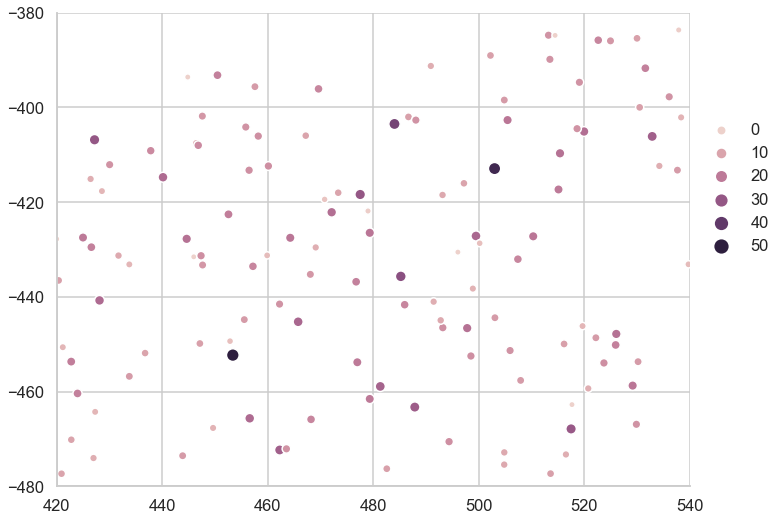

In [1]:

import sys
import importlib
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

# def get_eucledean_dist(a, b):
#     return np.linalg.norm(
#         (a[0]-b[0], a[1]-b[1], a[2]-b[2]))

# def get_distance(u, v):
#     return get_eucledean_dist(u, v)

import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')


# fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_210407_all.gz')
fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'gen_db/mf_grc/input_graph_210519_all.gz')
input_graph = compress_pickle.load(fname)


grcs = [k for k in input_graph.grcs.keys()]

z_min = 19800
z_max = 29800
# z_min = 19800-10000
# z_max = 29800+10000
# z_min = 19800+2500
# z_max = 29800-2500
z_min = 19800-2500
z_max = 29800+2500
z_min = 19800-5000
z_max = 29800+5000
# GrCs are fully reconstructed and proofread from 90k to 150k
# x_min = 100*1000*4
# x_max = 140*1000*4
x_min = 105*1000*4
x_max = 135*1000*4
# x_max = 115*1000*4
# x_max = 125*1000*4

mpd = MyPlotData()
claw_count_locs = []

n_rosettes = 0
for mf_id, mf in input_graph.mfs.items():
    rosette_capacities = mf.get_all_mf_locs_size()
    for rosette_loc, claw_count in rosette_capacities.items():
        x, y, z = rosette_loc
        if x < x_min or x > x_max:
            continue
        if z < z_min or z > z_max:
            continue
        mpd.add_data_point(
#             x=x/1000-x_min,
            x=x/1000,
            y=-y/1000,
            z=z/1000,
            claw_count=claw_count,
            claw_count_size=claw_count*2,
            )
        n_rosettes += 1
        if claw_count:
            claw_count_locs.append((claw_count, mf_id, to_ng_coord(rosette_loc)))

print(f'Counted {n_rosettes} rosettes.')

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1, .8), loc='upper left', frameon=False)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    kind='scatter',
    x="x",
    y="y",
#     ax=ax,
    hue="claw_count",
    size="claw_count",
    xlim=(420, 540),
    ylim=(-480, -380),
    width=10,
    custom_legend_fn=custom_legend_fn,
    )

In [10]:
claw_count_locs.sort(key=lambda x: x[0])
claw_count_locs

[(1, 'mf_169', (119756, 105469, 826)),
 (1, 'mf_650', (134482, 95915, 527)),
 (3, 'mf_199', (117699, 104856, 521)),
 (4, 'mf_375', (113216, 112338, 714)),
 (4, 'mf_184', (125049, 107172, 371)),
 (5, 'mf_191', (114975, 107812, 425)),
 (5, 'mf_504', (134945, 108283, 669)),
 (6, 'mf_52', (108441, 108288, 831)),
 (6, 'mf_141', (129924, 111542, 395)),
 (6, 'mf_82', (107143, 104419, 691)),
 (6, 'mf_532', (106823, 116070, 636)),
 (6, 'mf_535', (105289, 112659, 860)),
 (7, 'mf_231', (124725, 109564, 645)),
 (7, 'mf_2', (112412, 116919, 395)),
 (7, 'mf_304', (134597, 100529, 566)),
 (8, 'mf_431', (106744, 118508, 821)),
 (8, 'mf_121', (122867, 110256, 371)),
 (8, 'mf_173', (117276, 107392, 594)),
 (8, 'mf_88', (106607, 103778, 794)),
 (8, 'mf_338', (130195, 114835, 570)),
 (8, 'mf_75', (122733, 97814, 518)),
 (8, 'mf_340', (129137, 118320, 522)),
 (8, 'mf_299', (133564, 103091, 453)),
 (9, 'mf_23', (111613, 101895, 766)),
 (9, 'mf_349', (126211, 118855, 600)),
 (9, 'mf_197', (123288, 104623, 49

In [21]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1, .8), loc='upper left', frameon=False)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    kind='scatter',
    x="x",
    y="z",
#     ax=ax,
    hue="claw_count",
    size="claw_count",
    width=10,
    custom_legend_fn=custom_legend_fn,
    )

Height: 7.518796992481203, Aspect: 1.33


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


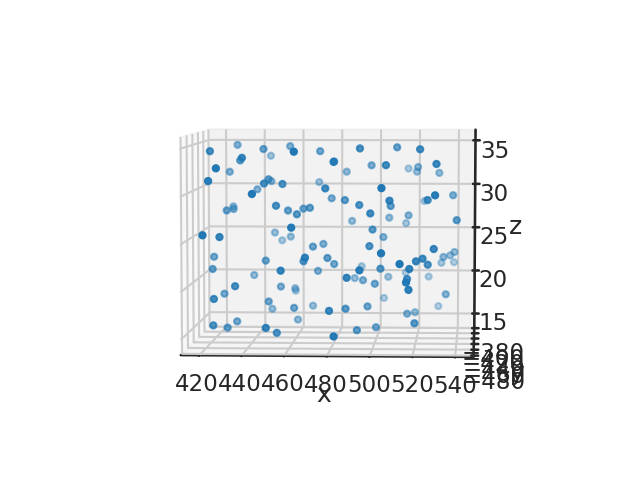

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

df = mpd.to_dataframe()

x = df['x']
y = df['y']
z = df['z']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)

plt.show()

Height: 6, Aspect: 1.33


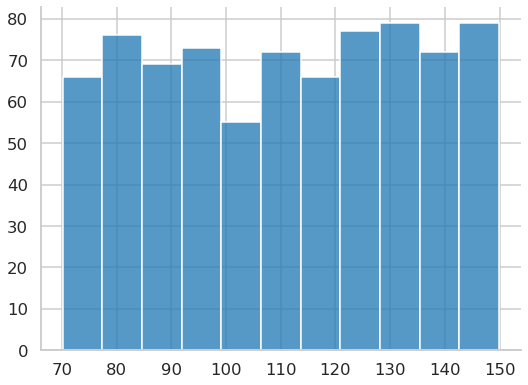

In [3]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x",
    )

Height: 6, Aspect: 1.33


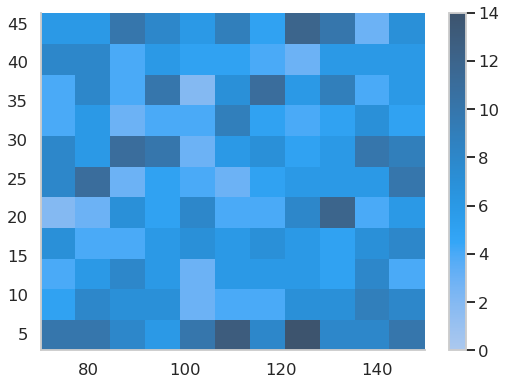

In [4]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x",
    y='z',
    cbar=True,
    )

In [2]:
n_mfs = 0
for mf_id, mf in input_graph.mfs.items():
    do_count = False
    for loc in mf.locs:
        x, y, z = loc
        if x < x_min*1000 or x > x_max*1000:
            continue
        if z < z_min*1000 or z > z_max*1000:
            continue
        do_count = True
    if do_count:
        n_mfs += 1
print(f'n_mfs = {n_mfs} ({z_min}-{z_max})')


n_mfs = 378 (10-40)


Height: 4.0, Aspect: 2.5


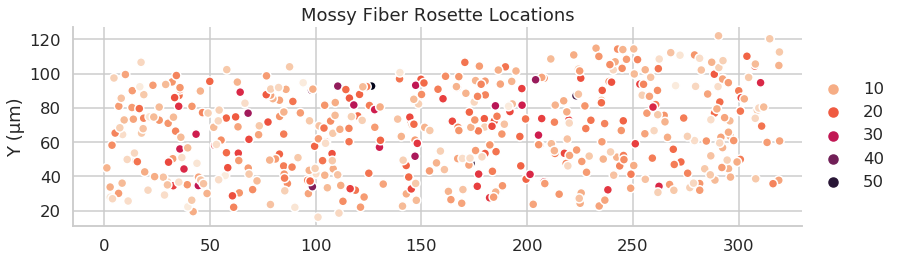

Height: 4.0, Aspect: 2.5


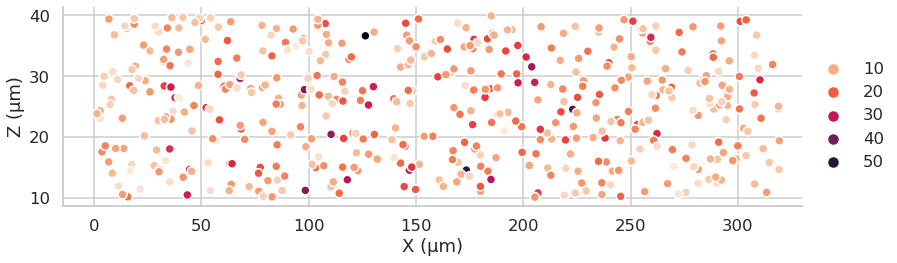

In [47]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1, .8), loc='upper left', frameon=False)

save_filename=f'mf_rosette_locations_figure_210514.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    kind='scatter',
    x="x",
    y="y",
    aspect=2.5,
    width=10,
    xlim=(None, x_max-x_min+10),
    hue="claw_count",
    palette=sns.color_palette("rocket_r", as_cmap=True),
    # alpha=.9,
    save_filename=save_filename,
    y_axis_label='Y (μm)',
    title='Mossy Fiber Rosette Locations',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


save_filename=f'mf_rosette_locations_figure_210116_xz.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    kind='scatter',
    x="x",
    y="z",
    aspect=2.5,
    width=10,
    xlim=(None, x_max-x_min+10),
#     size="claw_count",
    hue="claw_count",
    palette=sns.color_palette("rocket_r", as_cmap=True),
    # alpha=.9,
    y_axis_label='Z (μm)',
    x_axis_label='X (μm)',
    save_filename=save_filename,
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


In [2]:
# Counting all MF rosettes

n_rosettes = 0
for mf_id, mf in input_graph.mfs.items():
    rosette_capacities = mf.get_all_mf_locs_size()
    for rosette_loc, claw_count in rosette_capacities.items():
        x, y, z = rosette_loc
#         if x < x_min or x > x_max:
#             continue
#         if z < z_min or z > z_max:
#             continue
        mpd.add_data_point(
#             x=x/1000-x_min,
            x=x/1000,
            y=-y/1000,
            z=z/1000,
            claw_count=claw_count,
            claw_count_size=claw_count*2,
            )
        n_rosettes += 1
        if claw_count:
            claw_count_locs.append((claw_count, mf_id, to_ng_coord(rosette_loc)))

print(f'Counted {n_rosettes} rosettes.')


Counted 1145 rosettes.


In [5]:
# Counting all MFs within a 320 x 80 x 50 common subvolume

# x_min = 105*1000*4
# x_max = 135*1000*4
x_min = 280*1000
x_max = 600*1000

n_rosettes = 0
for mf_id, mf in input_graph.mfs.items():
    rosette_capacities = mf.get_all_mf_locs_size()
    for rosette_loc, claw_count in rosette_capacities.items():
        x, y, z = rosette_loc
        if x < x_min or x > x_max:
            continue
#         if z < z_min or z > z_max:
#             continue
        mpd.add_data_point(
#             x=x/1000-x_min,
            x=x/1000,
            y=-y/1000,
            z=z/1000,
            claw_count=claw_count,
            claw_count_size=claw_count*2,
            )
        n_rosettes += 1
        if claw_count:
            claw_count_locs.append((claw_count, mf_id, to_ng_coord(rosette_loc)))

print(f'Counted {n_rosettes} rosettes.')


Counted 784 rosettes.
